In [35]:
%matplotlib inline
import requests
import pandas as pd
import json
import pdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import random

In [34]:
random.seed(54)

In [2]:
client_id = 'soccer-data.p.rapidapi.com' 
api_key = '50e793e514msh10bde0be822b28ap1e78c7jsnf0954014cacc'

In [3]:
Request_URL = 'https://developers.broadage.com/soccer-api/match-events-basic'
Request_URL_2 = 'https://soccer-data.p.rapidapi.com'

In [4]:
df_1 = pd.read_csv('/Users/flatironschool/Desktop/mod_3_P/kick_locations.csv')
#df_1.head()
#df_1.iloc[0,6:7]=22

In [5]:
#create new df with shot percentage
df_1['out%']=df_1['Out of Box (G)']/df_1['Out of Box (S)']
df_1['pen%']=df_1['Penalty Area (G)']/df_1['Penalty Area (S)']
df_1['six%']=df_1['Six Yard Box (G)']/df_1['Six Yard Box (S)']
df_1['prf%']=df_1['Preferred (G)']/df_1['Preferred (S)']
df_1['wek%']=df_1['Weak (G)']/df_1['Weak (S)']
df_1['hed%']=df_1['Head (G)']/df_1['Head (S)']


In [6]:
df_3=df_1[['Year', 'Player', 'Preferred Foot', 'Out of Box (S)', 'Out of Box (G)',
       'Penalty Area (S)', 'Penalty Area (G)', 'Six Yard Box (S)',
       'Six Yard Box (G)', 'Preferred (S)', 'Preferred (G)', 'Weak (S)',
       'Weak (G)', 'Head (S)', 'Head (G)', 'All (S)', 'All (G)']]

In [7]:
df_2=df_1[['Player','out%','pen%','six%','prf%','wek%','hed%']]

In [119]:
#df_2.reset_index()
df_2.head(3)

,Player,out%,pen%,six%,prf%,wek%,hed%
0,Aguero,0.060606,0.018519,0.285714,0.187500,0.175000,0.294118
1,Kane,0.043478,0.259259,0.500000,0.152778,0.217391,0.083333
2,Diego Costa,0.000000,0.271186,0.571429,0.285714,0.227273,0.250000


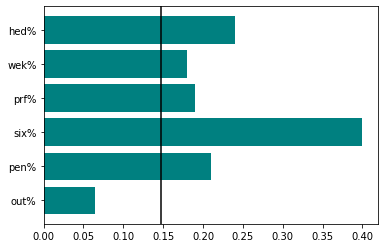

In [122]:
plt.barh(['out%','pen%','six%','prf%','wek%','hed%'],[.064,.21,.40,.19,.18,.24],color='teal')
plt.axvline(0.1476,color='k')

In [9]:
df_3.head(3)

,Year,Player,Preferred Foot,Out of Box (S),Out of Box (G),Penalty Area (S),Penalty Area (G),Six Yard Box (S),Six Yard Box (G),Preferred (S),Preferred (G),Weak (S),Weak (G),Head (S),Head (G),All (S),All (G)
0,2014/15,Aguero,R,33,2,108,2,7,2,96,18,40,7,17,5,148,6
1,2014/15,Kane,R,46,2,54,14,10,5,72,11,23,5,12,1,110,21
2,2014/15,Diego Costa,R,10,0,59,16,7,4,42,12,22,5,12,3,76,20


In [70]:
def get_sample_means(n,p,sample_size,iterations):
    sample_means = []
    sample_mean = 0
    for i in range(iterations):
        sample_mean=round(np.random.binomial(n,p,sample_size).mean(),3)
        sample_means.append(sample_mean)
    return sample_means

In [11]:
    shot_dict={'out':75/1329,'penalty':662/3206,'six':185/465,'strong':601/3310,'weak':183/1011,'head':132/659,'all':902/5000}

In [38]:
#14.76% shot percent based goals and shots per game 2019/2020 and a small striker boost multiple
scaled_pop_shot_dict ={'out':196,'penalty':473,'six':68,'strong':488,'weak':149,'head':97}

In [118]:
print('out','','pen','','six','','prf','','wek','','hed')
print('')
print(196,'',473,'',68,'',488,'',149,'',97)
print('')
print(75,'',662,'',185,'',601,'',183,'',132)

out  pen  six  prf  wek  hed

196  473  68  488  149  97

75  662  185  601  183  132


In [123]:
current_var = (254)*(30/254)*(1-30/254)
current_std = current_var**.5
current_std

5.143606994453

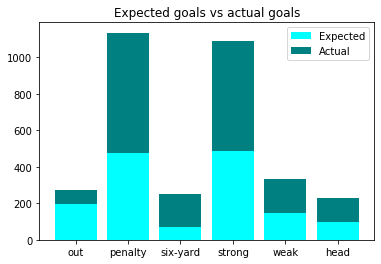

In [147]:
p1 = plt.bar(['out','penalty','six-yard','strong','weak','head'], [196,473,68,488,149,97],color='aqua')
p2 = plt.bar(['out','penalty','six-yard','strong','weak','head'], [75,662,185,601,183,132],bottom=[196,473,68,488,149,97],color='teal')
plt.title('Expected goals vs actual goals')
plt.legend((p1[0], p2[0]), ('Expected', 'Actual'))

In [149]:
shot_dict={'out':75/1329,'penalty':662/3206,'six':185/465,'strong':601/3310,'weak':183/1011,'head':132/659,'all':902/5000}
0.1476

0.1476

In [160]:
print('out% p-value')
stats.binom_test([75,(1329-75)],0.1476)

out% p-value


1.6010536731017642e-276

In [161]:
print('penalty% p-value')

stats.binom_test([662,(3206-662)],0.1476)

penalty% p-value


4.423598778984546e-258

In [162]:
print('six-yard% p-value')

stats.binom_test([185,(465-185)],0.1476)

six-yard% p-value


1.2231450689944592e-05

In [166]:
print('strong% p-value')

stats.binom_test([601,(3310-601)],0.1476)

strong% p-value


2.0090567e-317

In [167]:
print('weak% p-value')

stats.binom_test([183,(1011-183)],0.1476)

weak% p-value


1.68416560493203e-98

In [168]:
print('header% p-value')

stats.binom_test([340,(659-132)],0.1476)

header% p-value


2.2840724050185937e-10